In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('watson_healthcare_modified.csv')

In [3]:
df.shape

(1676, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
pd.set_option('display.max_columns',None)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.drop('EmployeeID',inplace=True,axis=1)#id is of no use

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

# Attrition
target variable

In [9]:
df.Attrition.value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

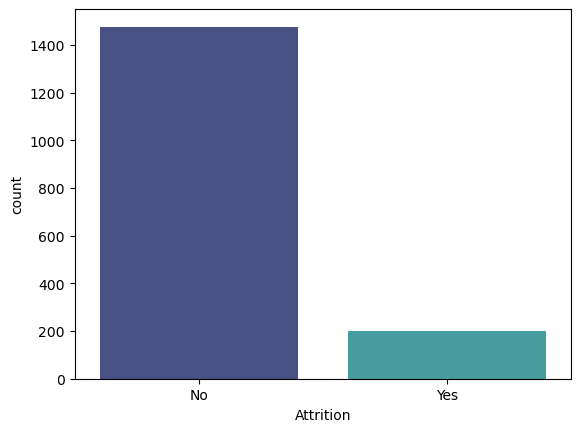

In [10]:
sns.countplot(df.Attrition,palette='mako')

## Age

In [11]:
df.Age.value_counts()

35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: Age, dtype: int64

In [12]:
df.Age.nunique()

43

<AxesSubplot:xlabel='Age', ylabel='Density'>

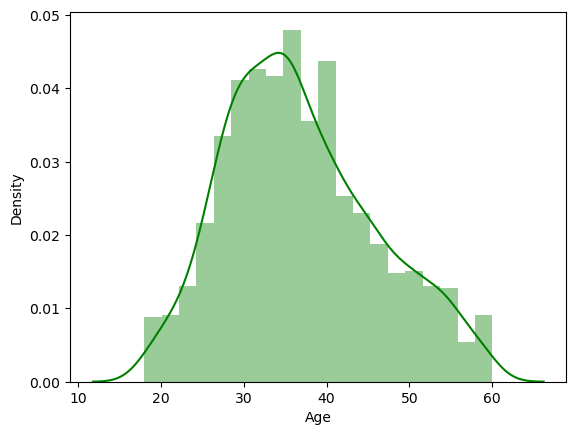

In [13]:
sns.distplot(df.Age,color='g')

<AxesSubplot:xlabel='Age'>

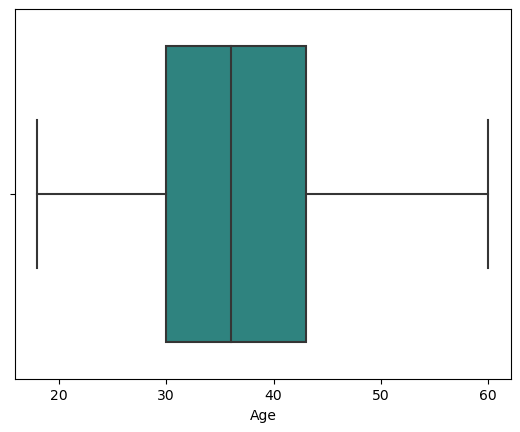

In [14]:
sns.boxplot(df.Age,palette='viridis')

In [15]:
model = ols("Age~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq     mean_sq          F  PR(>F)
Attrition     1.0    8039.64692  8039.64692  102.30112     0.0
Residual   1674.0  131556.41514    78.58806        NaN     NaN


## DailyRate

In [16]:
df.DailyRate.value_counts()

691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: DailyRate, Length: 886, dtype: int64

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

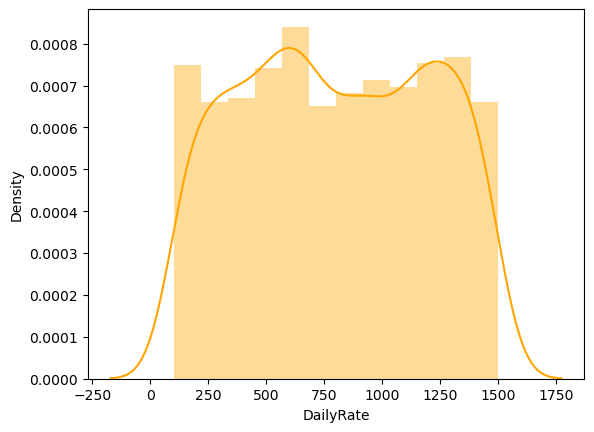

In [17]:
sns.distplot(df.DailyRate,color='orange')

<AxesSubplot:xlabel='DailyRate'>

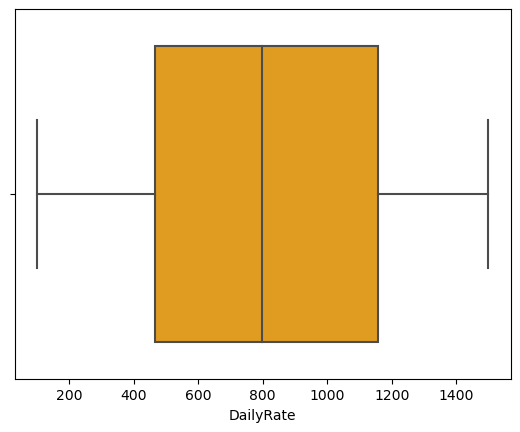

In [18]:
sns.boxplot(df.DailyRate,color='orange')

In [19]:
model = ols("DailyRate~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq       mean_sq        F   PR(>F)
Attrition     1.0  7.845809e+05  784580.93018  4.87603  0.02737
Residual   1674.0  2.693562e+08  160905.74938      NaN      NaN


## Education

In [20]:
df.Education.value_counts()#ordnal

3    655
4    447
2    322
1    196
5     56
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

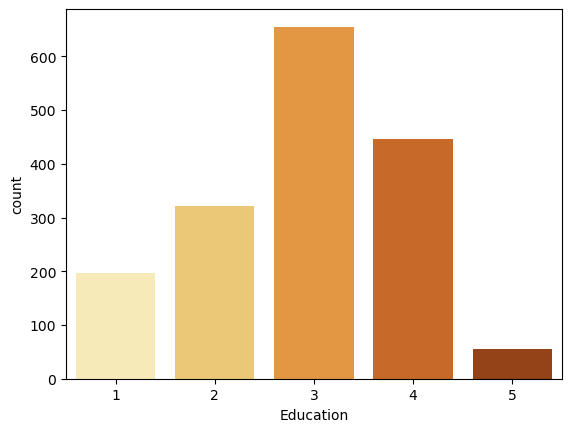

In [21]:
sns.countplot(df.Education,palette='YlOrBr')

In [22]:
model = ols("Education~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df      sum_sq  mean_sq        F   PR(>F)
Attrition     1.0     2.65944  2.65944  2.52948  0.11193
Residual   1674.0  1760.00584  1.05138      NaN      NaN


In [23]:
df.drop('Education',axis=1,inplace=True)#because p-value is greater than 0.05

# EmployeeCount

In [24]:
df.EmployeeCount.value_counts()

1    1676
Name: EmployeeCount, dtype: int64

In [25]:
df.drop('EmployeeCount',axis=1,inplace=True)

## EnvironmentSatisfaction

In [26]:
df.EnvironmentSatisfaction.value_counts()#orinal variable

3    512
4    508
1    330
2    326
Name: EnvironmentSatisfaction, dtype: int64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

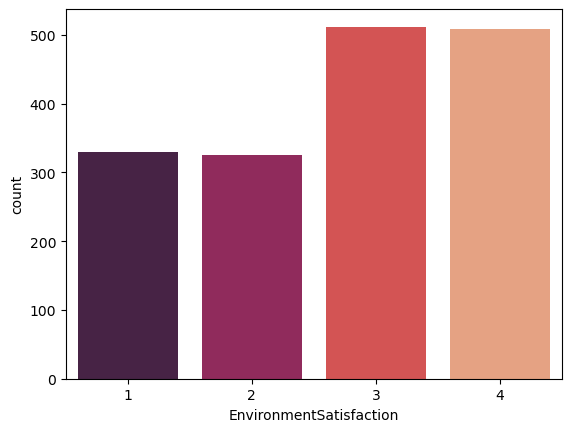

In [27]:
sns.countplot(df.EnvironmentSatisfaction,palette='rocket')

In [28]:
model = ols("EnvironmentSatisfaction~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df      sum_sq   mean_sq        F   PR(>F)
Attrition     1.0    20.69556  20.69556  17.3484  0.00003
Residual   1674.0  1996.97747   1.19294      NaN      NaN


## HourlyRate

In [29]:
df.HourlyRate.value_counts()#orinal variable

48    35
84    34
79    33
66    33
42    33
      ..
50    17
93    17
68    17
38    16
34    14
Name: HourlyRate, Length: 71, dtype: int64

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

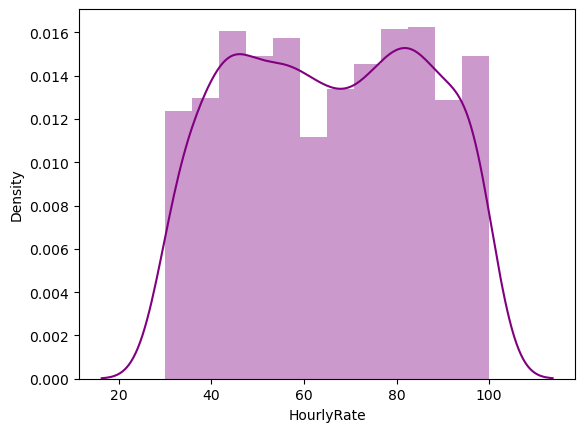

In [30]:
sns.distplot(df.HourlyRate,color='purple')

<AxesSubplot:xlabel='HourlyRate'>

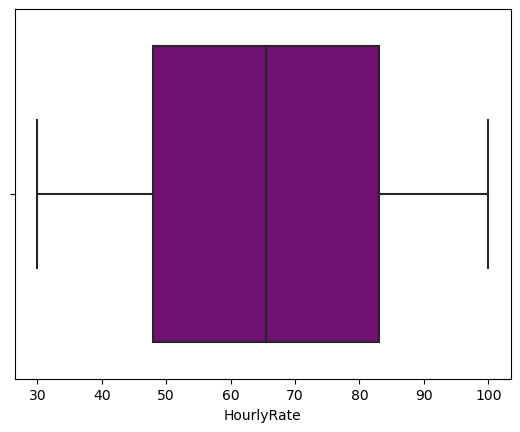

In [31]:
sns.boxplot(df.HourlyRate,color='purple')

In [32]:
model = ols("HourlyRate~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq    mean_sq        F   PR(>F)
Attrition     1.0     901.26581  901.26581  2.20871  0.13742
Residual   1674.0  683078.24254  408.05152      NaN      NaN


In [33]:
df.drop('HourlyRate',axis=1,inplace=True)#because p-value is greater than 0.05

## JobInvolvement

In [34]:
df.JobInvolvement.value_counts()#orinal variable

3    983
2    433
4    164
1     96
Name: JobInvolvement, dtype: int64

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

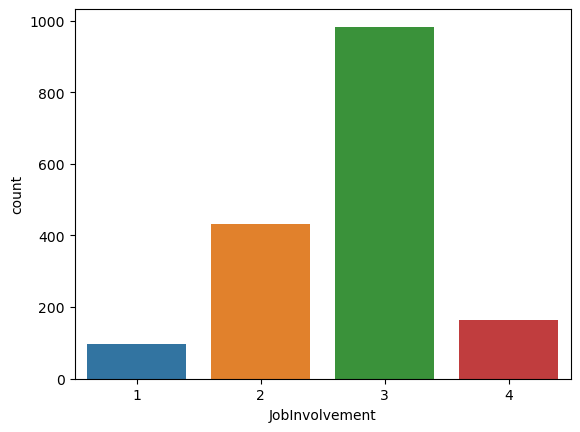

In [35]:
sns.countplot(df.JobInvolvement)

In [36]:
model = ols("JobInvolvement~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df     sum_sq   mean_sq        F  PR(>F)
Attrition     1.0   23.54855  23.54855  47.4572     0.0
Residual   1674.0  830.64895   0.49621      NaN     NaN


## JobLevel

In [37]:
df.JobLevel.value_counts()#orinal variable

1    621
2    606
3    246
4    122
5     81
Name: JobLevel, dtype: int64

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

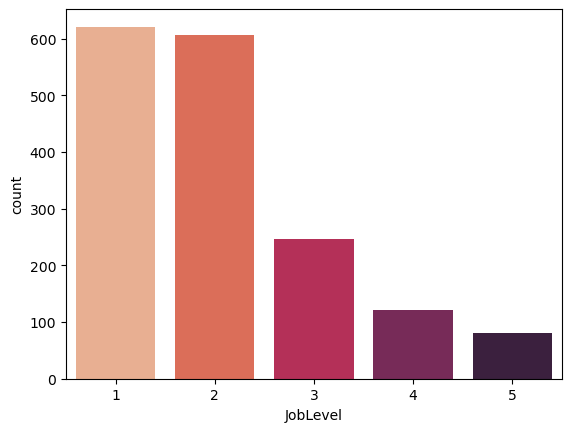

In [38]:
sns.countplot(df.JobLevel,palette='rocket_r')

In [39]:
model = ols("JobLevel~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(anova)

               df       sum_sq    mean_sq          F        PR(>F)
Attrition     1.0    89.522253  89.522253  75.420614  8.870806e-18
Residual   1674.0  1986.993260   1.186973        NaN           NaN


# JobSatisfaction

In [40]:
df.JobSatisfaction.value_counts()#orinal variable

4    530
3    507
1    329
2    310
Name: JobSatisfaction, dtype: int64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

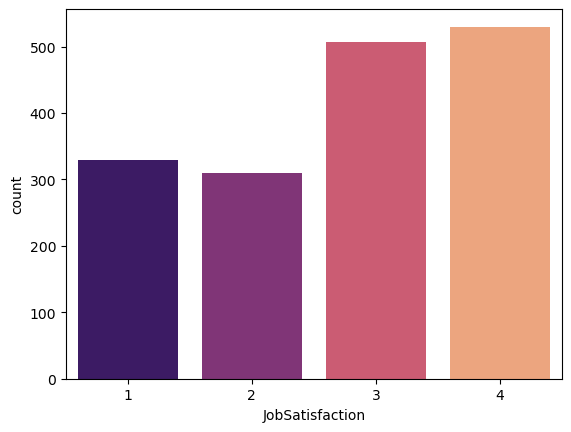

In [41]:
sns.countplot(df.JobSatisfaction,palette='magma')

In [42]:
model = ols("JobSatisfaction~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df      sum_sq   mean_sq         F   PR(>F)
Attrition     1.0    13.68759  13.68759  11.29918  0.00079
Residual   1674.0  2027.84702   1.21138       NaN      NaN


## MonthlyIncome

In [43]:
df.MonthlyIncome.value_counts()#orinal variable

2741     4
2340     4
5562     4
2342     4
5993     3
        ..
10475    1
4960     1
7625     1
6796     1
2836     1
Name: MonthlyIncome, Length: 1349, dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

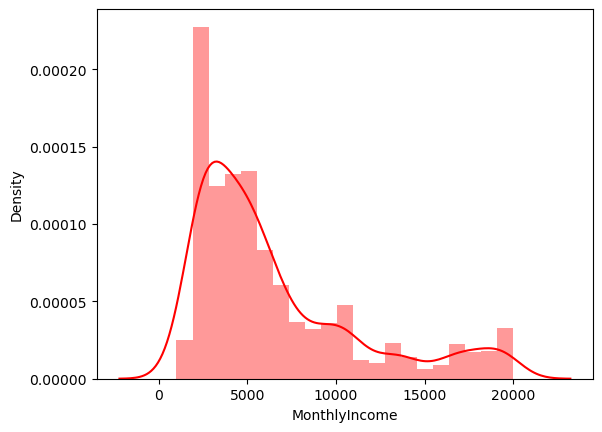

In [44]:
sns.distplot(df.MonthlyIncome,color='r')

<AxesSubplot:xlabel='MonthlyIncome'>

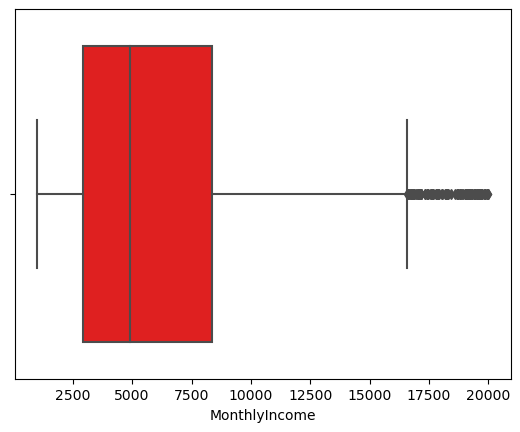

In [45]:
sns.boxplot(df.MonthlyIncome,color='r')

In [46]:
q3=df.MonthlyIncome.quantile(0.75)
q1=df.MonthlyIncome.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [47]:
df.MonthlyIncome=np.where(df.MonthlyIncome>upper,upper,df.MonthlyIncome)

<AxesSubplot:xlabel='MonthlyIncome'>

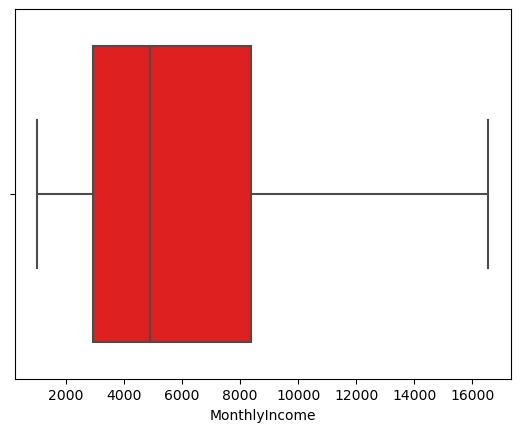

In [48]:
sns.boxplot(df.MonthlyIncome,color='r')

In [49]:
model = ols("MonthlyIncome~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq       mean_sq         F  PR(>F)
Attrition     1.0  1.275828e+09  1.275828e+09  69.69261     0.0
Residual   1674.0  3.064508e+10  1.830650e+07       NaN     NaN


# MonthlyRate

In [50]:
df.MonthlyRate.value_counts()#orinal variable

4223     4
19373    4
11652    3
9150     3
7744     3
        ..
17654    1
15232    1
18959    1
7791     1
26997    1
Name: MonthlyRate, Length: 1427, dtype: int64

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

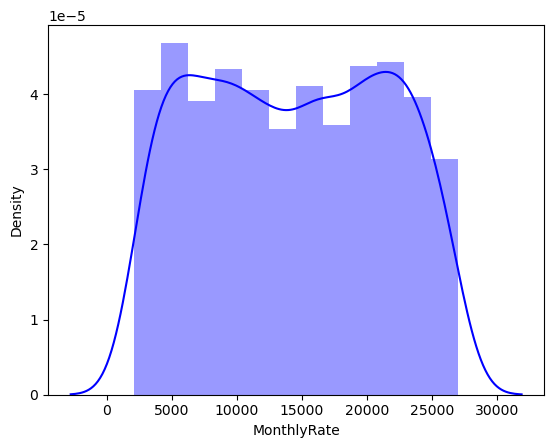

In [51]:
sns.distplot(df.MonthlyRate,color='b')

<AxesSubplot:xlabel='MonthlyRate'>

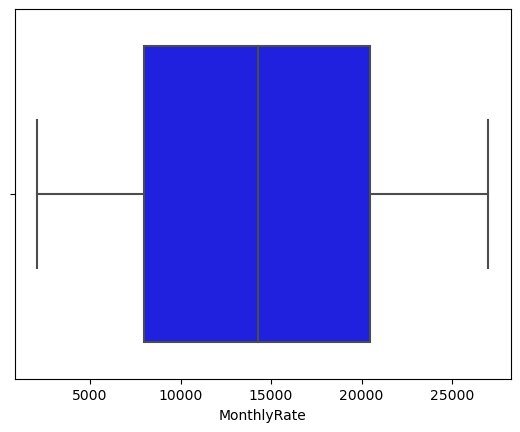

In [52]:
sns.boxplot(df.MonthlyRate,color='b')

In [53]:
model = ols("MonthlyRate~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq       mean_sq        F   PR(>F)
Attrition     1.0  1.786274e+08  1.786274e+08  3.51027  0.06116
Residual   1674.0  8.518488e+10  5.088703e+07      NaN      NaN


In [54]:
df.drop('MonthlyRate',inplace=True,axis=1)#because p-value is greater than 0.05

## NumCompaniesWorked

In [55]:
df.NumCompaniesWorked.value_counts()#orinal variable

1    601
0    223
3    180
2    173
4    156
7     84
6     79
5     70
9     59
8     51
Name: NumCompaniesWorked, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

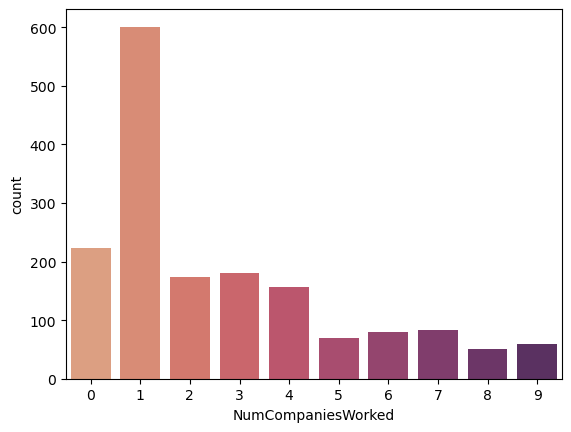

In [56]:
sns.countplot(df.NumCompaniesWorked,palette='flare')

In [57]:
model = ols("NumCompaniesWorked~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df       sum_sq  mean_sq        F   PR(>F)
Attrition     1.0      3.07021  3.07021  0.49997  0.47961
Residual   1674.0  10279.78659  6.14085      NaN      NaN


## PercentSalaryHike

In [58]:
df.PercentSalaryHike.value_counts()#orinal variable

11    241
13    236
14    229
12    227
15    114
18    103
17     93
19     92
16     89
20     63
22     60
21     54
23     31
24     23
25     21
Name: PercentSalaryHike, dtype: int64

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

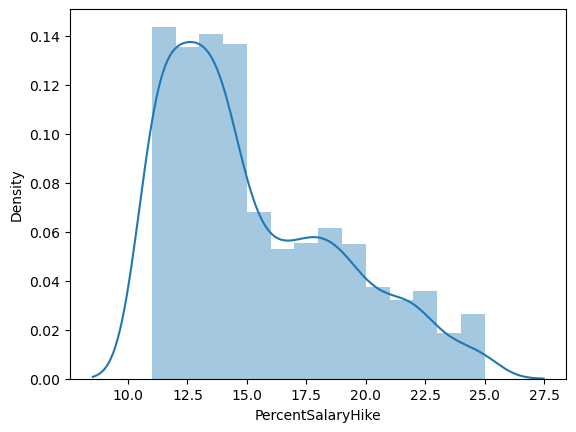

In [59]:
sns.distplot(df.PercentSalaryHike)

In [60]:
model = ols("PercentSalaryHike~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df       sum_sq   mean_sq       F   PR(>F)
Attrition     1.0      0.19298   0.19298  0.0145  0.90416
Residual   1674.0  22272.83089  13.30516     NaN      NaN


In [61]:
df.drop('PercentSalaryHike',inplace=True,axis=1)#because p-value is greater than 0.05

## PerformanceRating

In [62]:
df.PerformanceRating.value_counts()#orinal variable

3    1424
4     252
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

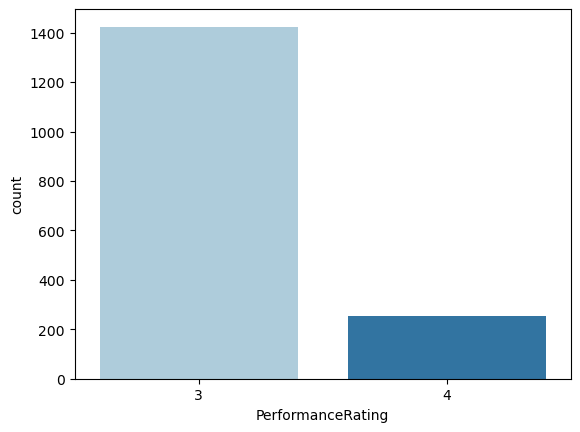

In [63]:
sns.countplot(df.PerformanceRating,palette='Paired')

In [64]:
model = ols("PerformanceRating~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df     sum_sq  mean_sq        F   PR(>F)
Attrition     1.0    0.02464  0.02464  0.19267  0.66076
Residual   1674.0  214.08514  0.12789      NaN      NaN


In [65]:
df.drop('PerformanceRating',inplace=True,axis=1)#because p-value is greater than 0.05

## RelationshipSatisfaction

In [66]:
df.RelationshipSatisfaction.value_counts()#orinal variable

3    526
4    494
2    346
1    310
Name: RelationshipSatisfaction, dtype: int64

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

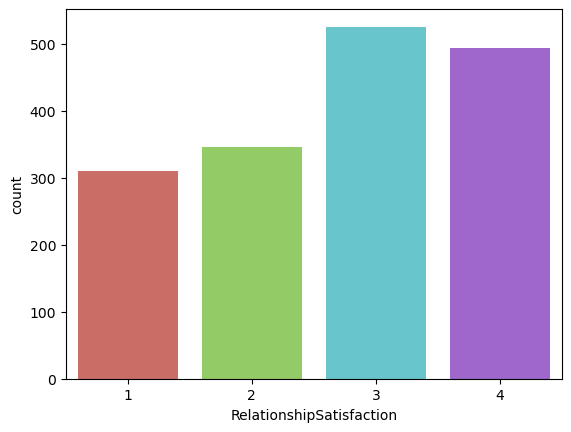

In [67]:
sns.countplot(df.RelationshipSatisfaction,palette='hls')

In [68]:
model = ols("RelationshipSatisfaction~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df      sum_sq  mean_sq       F  PR(>F)
Attrition     1.0     0.81524  0.81524  0.7012  0.4025
Residual   1674.0  1946.25874  1.16264     NaN     NaN


In [69]:
df.drop('RelationshipSatisfaction',inplace=True,axis=1)#because p-value is greater than 0.05

# StandardHours

In [70]:
df.StandardHours.value_counts()

80    1676
Name: StandardHours, dtype: int64

In [71]:
df.drop('StandardHours',inplace=True,axis=1)#there is only one value

## Shift

In [72]:
df.Shift.value_counts()#orinal variable

0    708
1    684
2    185
3     99
Name: Shift, dtype: int64

<AxesSubplot:xlabel='Shift', ylabel='count'>

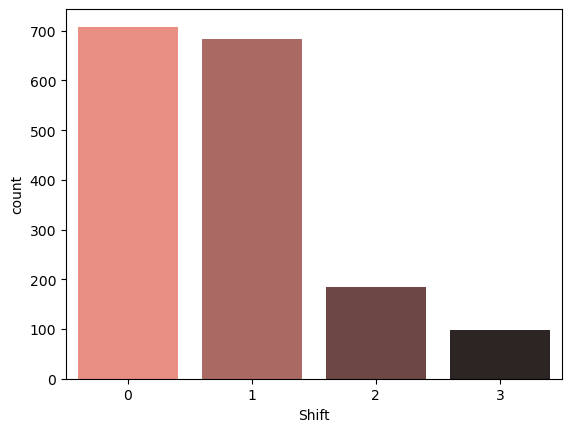

In [73]:
sns.countplot(df.Shift,palette='dark:salmon_r')

In [74]:
model = ols("Shift~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df      sum_sq   mean_sq         F  PR(>F)
Attrition     1.0    30.73009  30.73009  43.03892     0.0
Residual   1674.0  1195.24783   0.71401       NaN     NaN


# TotalWorkingYears

In [75]:
df.TotalWorkingYears.value_counts()#orinal variable

10    233
6     140
8     123
9     108
5     100
1      94
7      88
4      70
12     51
3      50
15     47
17     40
16     40
11     39
13     39
21     39
2      36
14     35
20     34
18     30
23     27
22     25
19     25
24     22
25     17
28     16
26     15
31     12
29     12
32     11
0      11
30      8
33      8
36      7
27      7
34      6
37      4
35      4
40      2
38      1
Name: TotalWorkingYears, dtype: int64

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

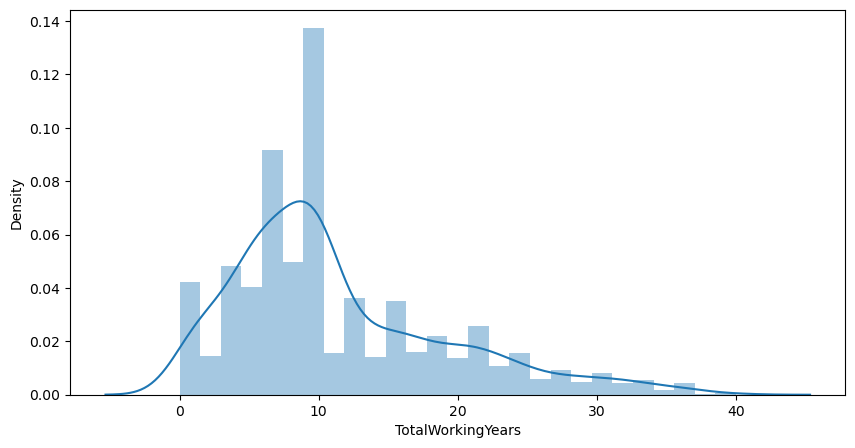

In [76]:
plt.figure(figsize=(10,5))
sns.distplot(df.TotalWorkingYears)

In [77]:
model = ols("TotalWorkingYears~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df       sum_sq     mean_sq         F  PR(>F)
Attrition     1.0   5638.95912  5638.95912  97.13085     0.0
Residual   1674.0  97184.54446    58.05528       NaN     NaN


# TrainingTimesLastYear

In [78]:
df.TrainingTimesLastYear.value_counts()#orinal variable

2    611
3    567
4    143
5    137
1     84
6     73
0     61
Name: TrainingTimesLastYear, dtype: int64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

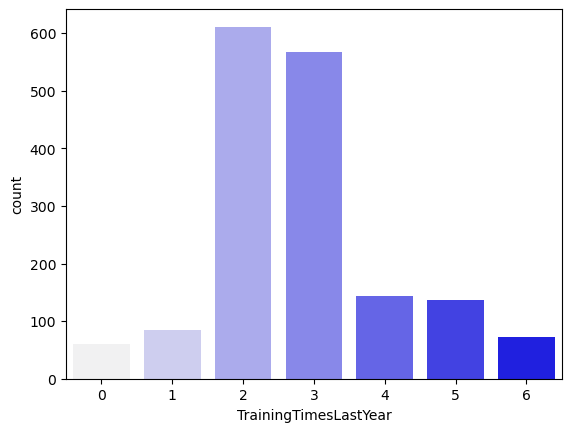

In [79]:
sns.countplot(df.TrainingTimesLastYear,palette='light:b')

In [80]:
model = ols("TrainingTimesLastYear~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df      sum_sq  mean_sq        F   PR(>F)
Attrition     1.0     8.36113  8.36113  5.04884  0.02477
Residual   1674.0  2772.22837  1.65605      NaN      NaN


# WorkLifeBalance

In [81]:
df.WorkLifeBalance.value_counts()#orinal variable

3    1028
2     385
4     173
1      90
Name: WorkLifeBalance, dtype: int64

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

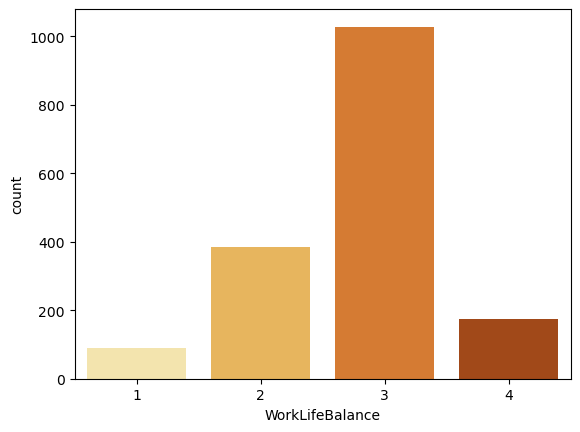

In [82]:
sns.countplot(df.WorkLifeBalance,palette='YlOrBr')

In [83]:
model = ols("WorkLifeBalance~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df     sum_sq  mean_sq         F   PR(>F)
Attrition     1.0    6.76965  6.76965  13.82766  0.00021
Residual   1674.0  819.54538  0.48957       NaN      NaN


# YearsAtCompany

In [84]:
df.YearsAtCompany.value_counts()#orinal variable

5     219
1     195
3     152
2     146
10    137
4     120
7     104
9      94
8      93
6      86
0      46
11     37
20     32
13     28
15     23
14     20
22     19
12     17
21     17
19     14
18     13
16     12
17     12
24      7
33      6
25      5
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

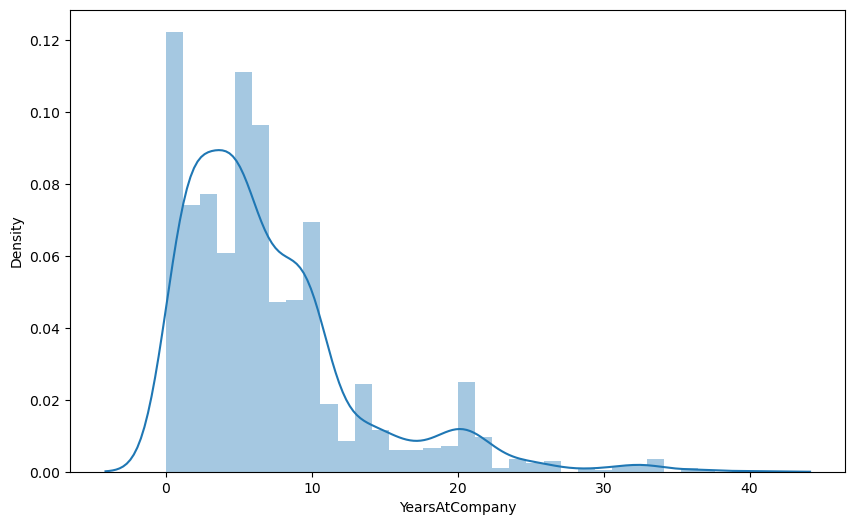

In [85]:
plt.figure(figsize=(10,6))
sns.distplot(df.YearsAtCompany)

In [86]:
model = ols("YearsAtCompany~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df       sum_sq     mean_sq         F  PR(>F)
Attrition     1.0   2526.56936  2526.56936  70.75123     0.0
Residual   1674.0  59779.55952    35.71061       NaN     NaN


## YearsInCurrentRole

In [87]:
df.YearsInCurrentRole.value_counts()#orinal variable

2     434
0     273
7     257
3     146
4     114
8     104
9      79
1      61
5      43
6      43
10     33
11     26
13     16
14     12
12     11
15      9
16      7
17      5
18      3
Name: YearsInCurrentRole, dtype: int64

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

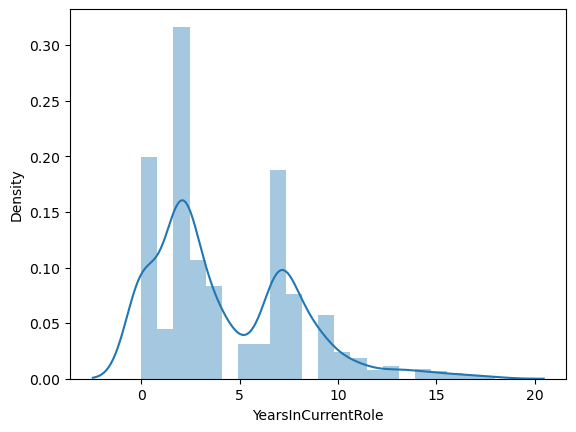

In [88]:
sns.distplot(df.YearsInCurrentRole)

In [89]:
model = ols("YearsInCurrentRole~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df       sum_sq    mean_sq         F  PR(>F)
Attrition     1.0    952.55217  952.55217  75.61578     0.0
Residual   1674.0  21087.82491   12.59727       NaN     NaN


## YearsSinceLastPromotion

In [90]:
df.YearsSinceLastPromotion.value_counts()#orinal variable

0     660
1     402
2     186
7      83
3      66
4      63
5      50
6      41
11     30
8      21
9      20
15     15
13     12
12     11
14      9
10      7
Name: YearsSinceLastPromotion, dtype: int64

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

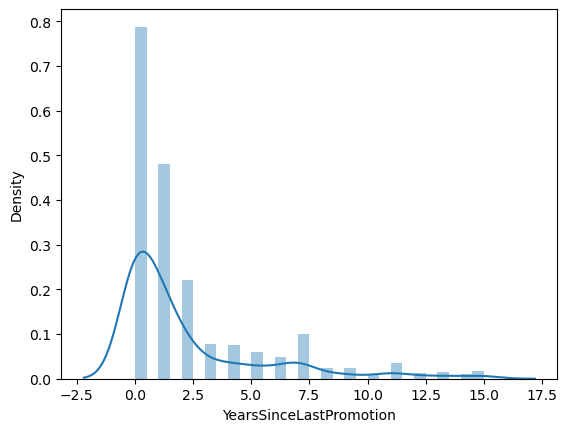

In [91]:
sns.distplot(df.YearsSinceLastPromotion)

In [92]:
model = ols("YearsSinceLastPromotion~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df       sum_sq    mean_sq         F   PR(>F)
Attrition     1.0    129.83449  129.83449  12.53361  0.00041
Residual   1674.0  17340.80513   10.35890       NaN      NaN


# YearsWithCurrManager

In [93]:
df.YearsWithCurrManager.value_counts()#orinal variable

2     404
0     297
7     247
3     155
8     122
4     108
1      83
9      77
5      35
6      34
10     32
11     25
12     21
13     16
17      7
15      6
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

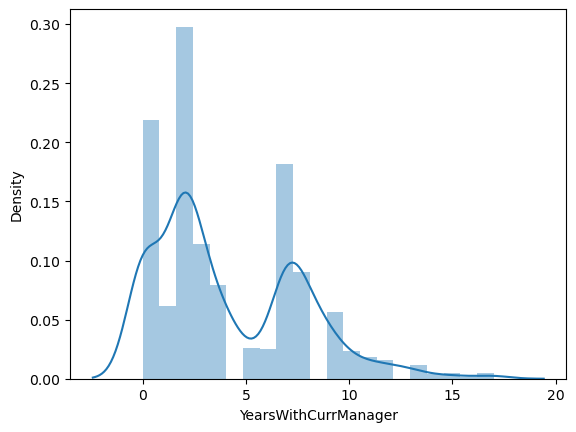

In [94]:
sns.distplot(df.YearsWithCurrManager)

In [95]:
model = ols("YearsWithCurrManager~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

               df       sum_sq    mean_sq         F  PR(>F)
Attrition     1.0    858.21948  858.21948  70.54193     0.0
Residual   1674.0  20366.03529   12.16609       NaN     NaN


# BusinessTravel

In [96]:
df.BusinessTravel.value_counts()#orinal variable

Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

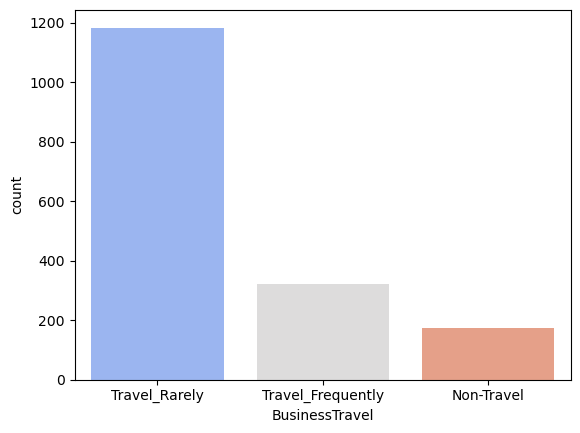

In [97]:
sns.countplot(df.BusinessTravel,palette='coolwarm')

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

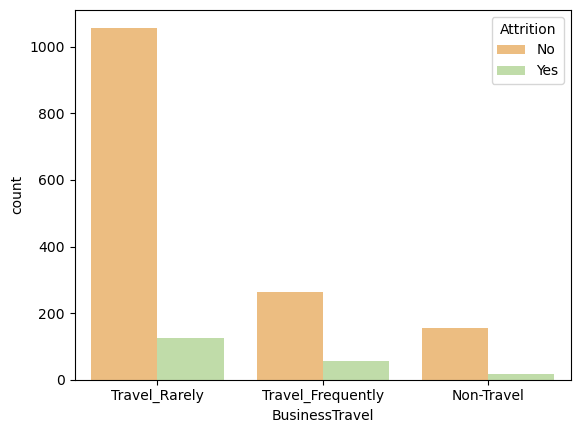

In [98]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df,palette='Spectral')#travel_rarely left the company

In [99]:
a=pd.crosstab(df.BusinessTravel,df.Attrition)
chi2_contingency(a)[1]

0.001119456597466221

# Department

In [100]:
df.Department.value_counts()

Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

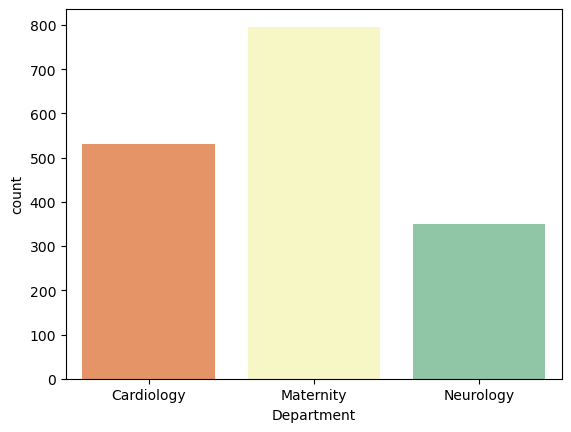

In [101]:
sns.countplot(df.Department,palette='Spectral')

<AxesSubplot:xlabel='Department', ylabel='count'>

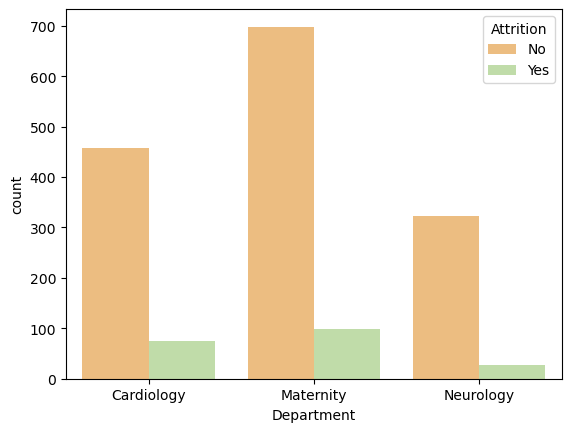

In [102]:
sns.countplot(x='Department',hue='Attrition',data=df,palette='Spectral')#employees who left in different depatments
# 'Maternity Deparment' is the department that modt of the employees left

In [103]:
a=pd.crosstab(df.Department,df.Attrition)
chi2_contingency(a)[1]

0.018194265980794714

## EducationField

In [104]:
df.EducationField.value_counts()

Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

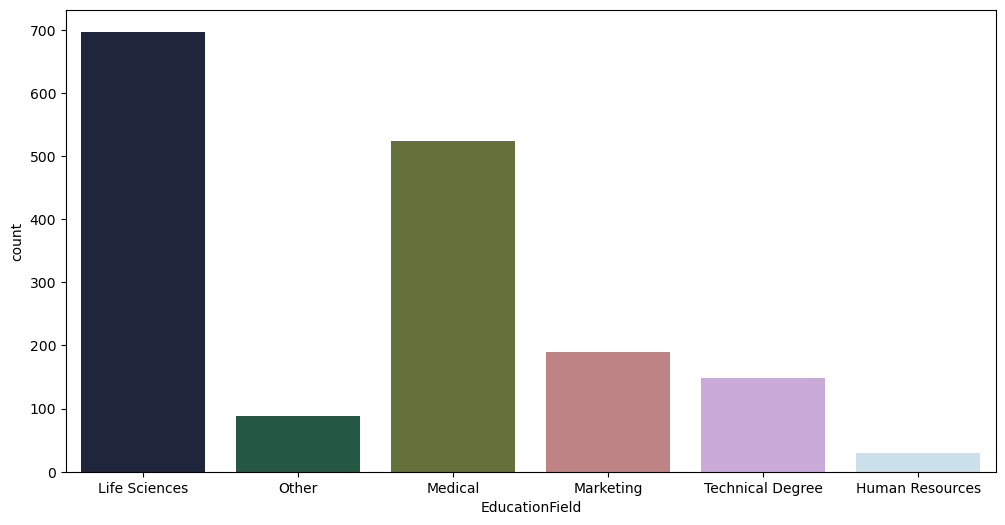

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(df.EducationField,palette='cubehelix')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

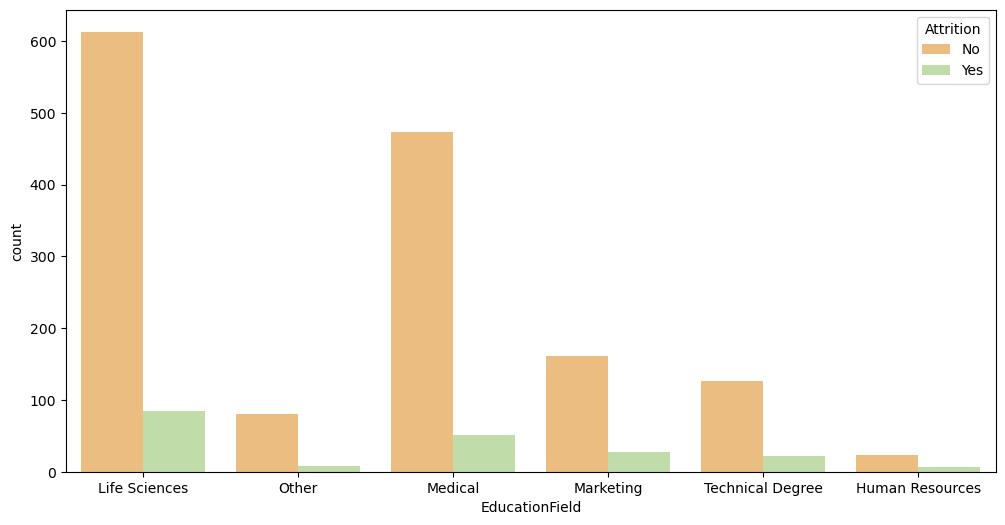

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(x='EducationField',hue='Attrition',data=df,palette='Spectral')#most of the employee from 'Life Science'EducationField left the company

In [107]:
a=pd.crosstab(df.EducationField,df.Attrition)
chi2_contingency(a)[1]

0.1632877592033215

In [108]:
df.drop('EducationField',inplace=True,axis=1)#because p-value is greater than 0.05

## Gender

In [109]:
df.Gender.value_counts()

Male      998
Female    678
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

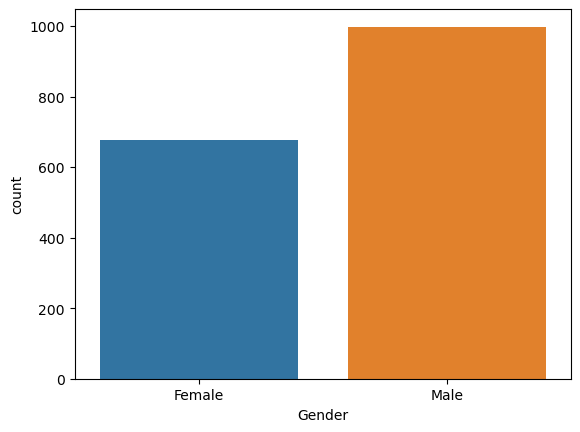

In [110]:
sns.countplot(df.Gender)

In [111]:
a=pd.crosstab(df.Gender,df.Attrition)
chi2_contingency(a)[1]

0.4419454127111361

In [112]:
df.drop('Gender',axis=1,inplace=True)#because p-value is greater than 0.05

# JobRole

In [113]:
df.JobRole.value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

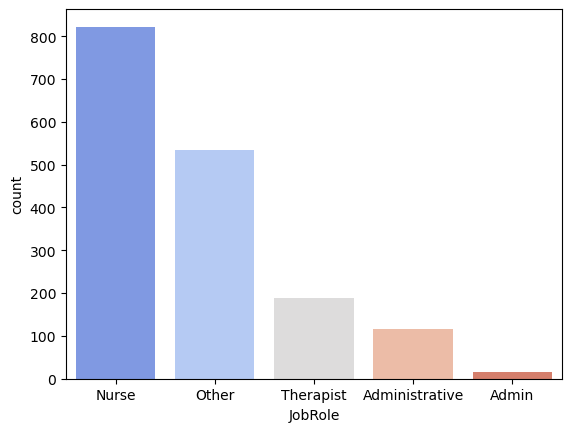

In [114]:
sns.countplot(df.JobRole,palette='coolwarm')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

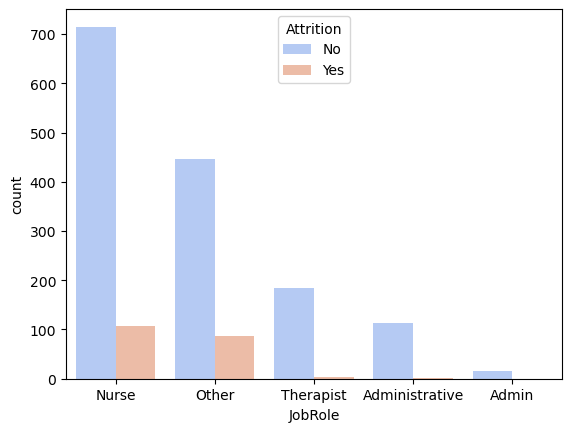

In [115]:
sns.countplot(x='JobRole',hue='Attrition',data=df,palette='coolwarm')#Nurse left the job

In [116]:
a=pd.crosstab(df.JobRole,df.Attrition)
chi2_contingency(a)[1]

7.58311282316894e-09

# MaritalStatus

In [117]:
df.MaritalStatus.value_counts()

Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

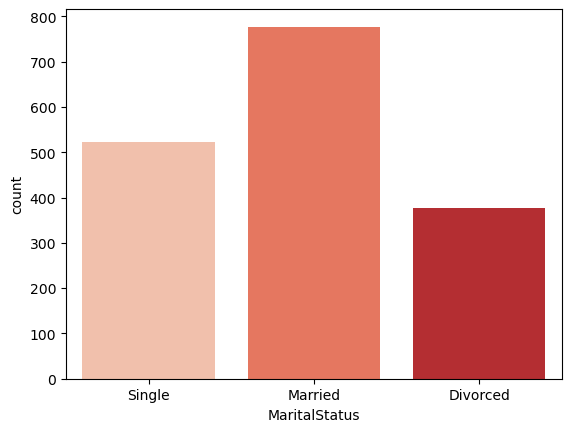

In [118]:
sns.countplot(df.MaritalStatus,palette='Reds')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

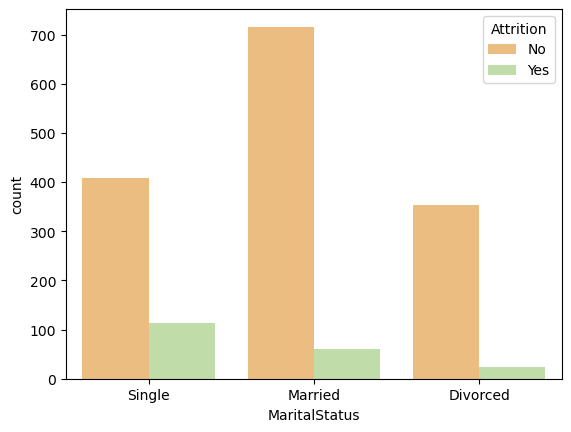

In [119]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df,palette='Spectral')#most of the singles left the job

In [120]:
a=pd.crosstab(df.MaritalStatus,df.Attrition)
chi2_contingency(a)[1]

1.816259262576239e-16

# Over18

In [121]:
df.Over18.value_counts()

Y    1676
Name: Over18, dtype: int64

In [122]:
df.drop('Over18',axis=1,inplace=True)#no use

# OverTime

In [123]:
df.OverTime.value_counts()

No     1200
Yes     476
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

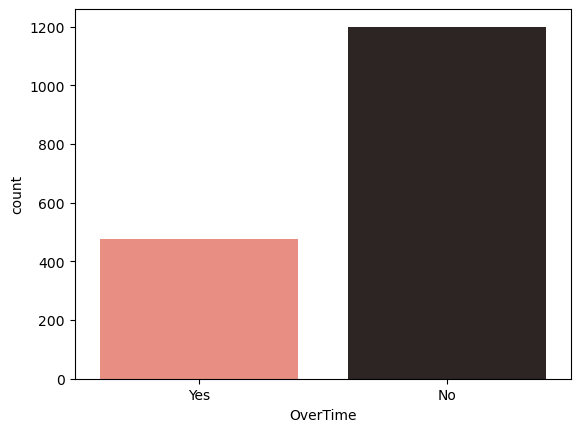

In [124]:
sns.countplot(df.OverTime,palette='dark:salmon_r')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

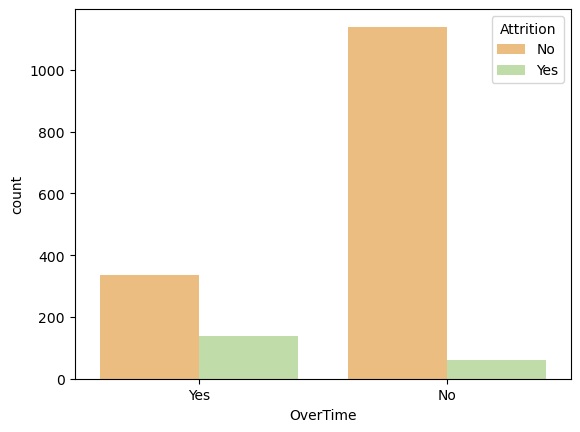

In [125]:
sns.countplot(x='OverTime',hue='Attrition',data=df,palette='Spectral')#most of the employees worked over time left the company

In [126]:
a=pd.crosstab(df.OverTime,df.Attrition)
chi2_contingency(a)[1]

6.865486230870457e-43

<AxesSubplot:>

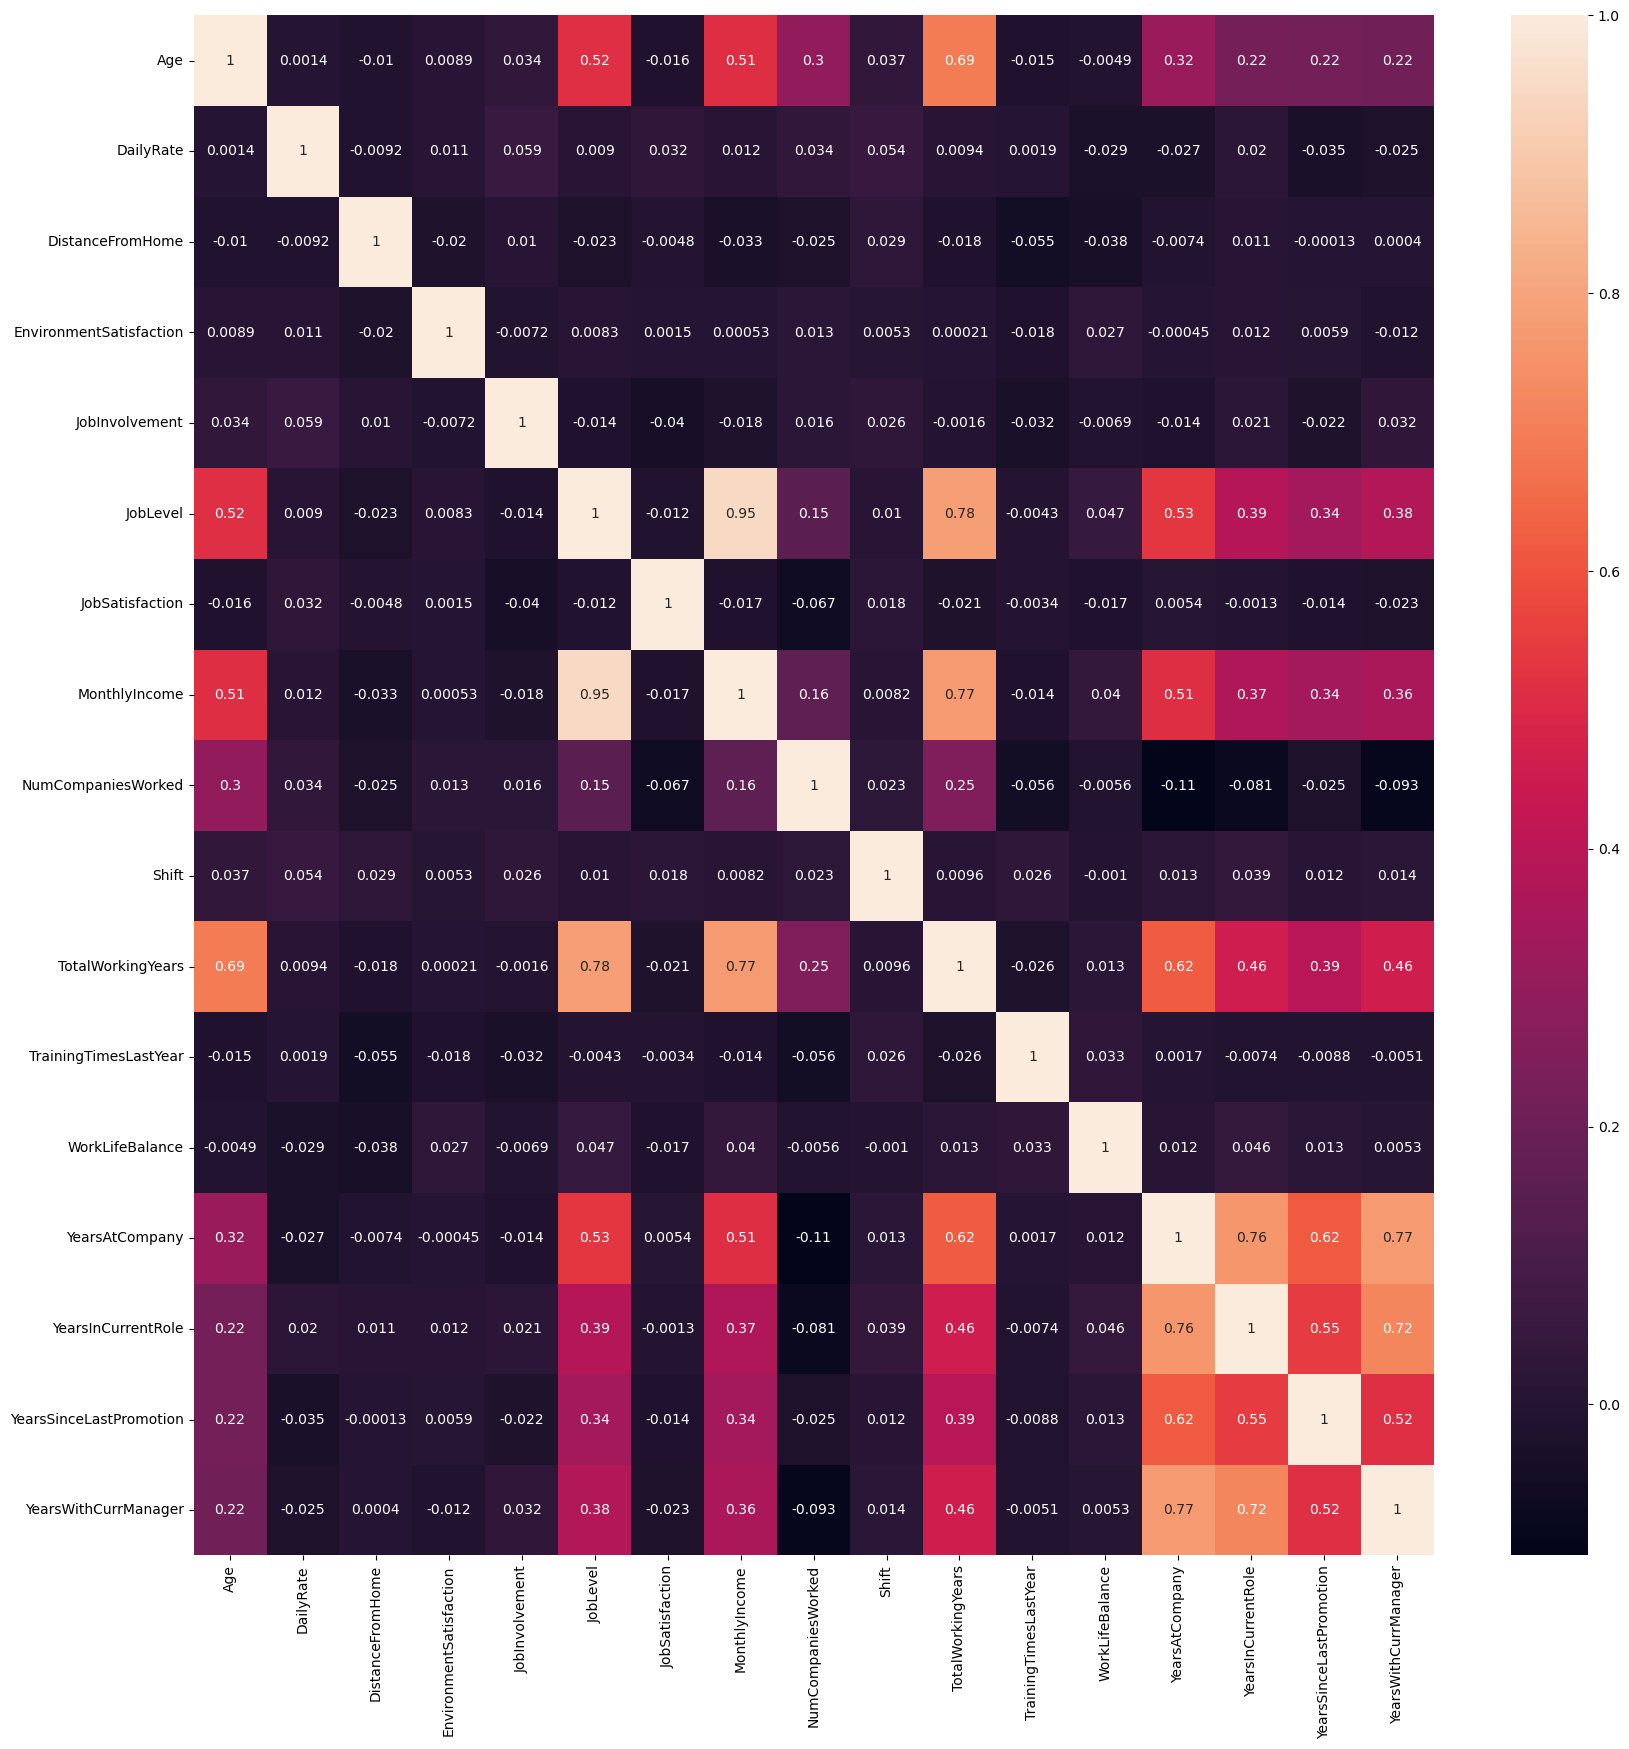

In [127]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)#year_at_company and years_in_curentrole is correlated

In [128]:
num_col=df.select_dtypes(include=np.number)
num_col.shape

(1676, 17)

# VIF

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
vif_da=num_col
vif_data=pd.DataFrame()
vif_data['feature']=vif_da.columns

vif_data['VIF']=[variance_inflation_factor(vif_da.values,i)for i in range(len(vif_da.columns))]
print(vif_data)

                    feature        VIF
0                       Age  27.559404
1                 DailyRate   4.844106
2          DistanceFromHome   2.236524
3   EnvironmentSatisfaction   6.630412
4            JobInvolvement  13.063448
5                  JobLevel  45.570427
6           JobSatisfaction   6.551265
7             MonthlyIncome  31.463080
8        NumCompaniesWorked   2.669853
9                     Shift   1.903967
10        TotalWorkingYears  13.795870
11    TrainingTimesLastYear   5.424771
12          WorkLifeBalance  13.317999
13           YearsAtCompany  10.490895
14       YearsInCurrentRole   6.515004
15  YearsSinceLastPromotion   2.445046
16     YearsWithCurrManager   6.576031


In [131]:
df.drop(['Age','JobLevel','MonthlyIncome','JobInvolvement','JobLevel','TotalWorkingYears','WorkLifeBalance','YearsAtCompany'],inplace=True,axis=1)

In [132]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,Shift,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,Travel_Rarely,1102,Cardiology,1,2,Nurse,4,Single,8,Yes,0,0,4,0,5
1,No,Travel_Frequently,279,Maternity,8,3,Other,2,Married,1,No,1,3,7,1,7
2,Yes,Travel_Rarely,1373,Maternity,2,4,Nurse,3,Single,6,Yes,0,3,0,0,0
3,No,Travel_Frequently,1392,Maternity,3,4,Other,3,Married,1,Yes,0,3,7,3,0
4,No,Travel_Rarely,591,Maternity,2,1,Nurse,2,Married,9,No,1,3,2,2,2


In [133]:
from sklearn.preprocessing import LabelEncoder

In [134]:
le=LabelEncoder()

In [135]:
df.Attrition=le.fit_transform(df.Attrition)

In [136]:
p=pd.get_dummies(df.BusinessTravel,drop_first=True)
o=pd.get_dummies(df.Department,drop_first=True)
i=pd.get_dummies(df.JobRole,drop_first=True)
u=pd.get_dummies(df.OverTime,drop_first=True)
y=pd.get_dummies(df.MaritalStatus,drop_first=True)


In [137]:
df=pd.concat([p,o,i,u,df],axis=1)

In [138]:
df.drop(['BusinessTravel','Department','JobRole','OverTime','MaritalStatus'],axis=1,inplace=True)

In [139]:
df.head()

,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Administrative,Nurse,Other,Therapist,Yes,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,NumCompaniesWorked,Shift,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,0,0,1,0,0,1,0,1102,1,2,4,8,0,0,4,0,5
1,1,0,1,0,0,0,1,0,0,0,279,8,3,2,1,1,3,7,1,7
2,0,1,1,0,0,1,0,0,1,1,1373,2,4,3,6,0,3,0,0,0
3,1,0,1,0,0,0,1,0,1,0,1392,3,4,3,1,0,3,7,3,0
4,0,1,1,0,0,1,0,0,0,0,591,2,1,2,9,1,3,2,2,2


## Smote

In [140]:
df.Attrition.value_counts()

0    1477
1     199
Name: Attrition, dtype: int64

In [141]:
no=df[df.Attrition==0]
yes=df[df.Attrition==1]

from sklearn.utils import resample

over=resample(yes,replace=True,n_samples=len(no),random_state=23)

dfsmote=pd.concat([no,over])
dfsmote.Attrition.value_counts()

0    1477
1    1477
Name: Attrition, dtype: int64

# 5. Data Preprocessing

In [142]:

x = dfsmote.drop("Attrition",axis = 1)
y =  dfsmote["Attrition"]

# GLM

In [143]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

In [144]:
gml = LogisticRegression(multi_class= 'ovr',random_state=30)
gml.fit(xtrain,ytrain)

LogisticRegression(multi_class='ovr', random_state=30)

In [145]:
y_pred = gml.predict(xtest)

In [146]:
accuracy_score(ytest,y_pred)

0.8083427282976324

In [147]:
print(metrics.confusion_matrix(ytest, y_pred))

[[358  89]
 [ 81 359]]


In [148]:
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       447
           1       0.80      0.82      0.81       440

    accuracy                           0.81       887
   macro avg       0.81      0.81      0.81       887
weighted avg       0.81      0.81      0.81       887



# Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(xtrain,ytrain)

LogisticRegression()

In [150]:
p_x=lm.predict(xtrain)

In [151]:
lm.score(xtest,ytest)

0.8083427282976324

In [152]:
print(metrics.classification_report(ytest, y_pred, labels = [0,1,2]))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       447
           1       0.80      0.82      0.81       440
           2       0.00      0.00      0.00         0

   micro avg       0.81      0.81      0.81       887
   macro avg       0.54      0.54      0.54       887
weighted avg       0.81      0.81      0.81       887



In [153]:
print(metrics.confusion_matrix(ytest, y_pred))


[[358  89]
 [ 81 359]]


# RandomForest

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


In [155]:
rf=RandomForestClassifier(random_state=30)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [156]:
params={
    'n_estimators':[800,900,1000.1100],
    'max_features':['sqrt',0.25],
    'min_samples_split':[2,4,6]
}

In [157]:
gd=GridSearchCV(rf,params)

In [158]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=30),
             param_grid={'max_features': ['sqrt', 0.25],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1000, 1100, 1200, 1500]})

In [159]:
rf=gd.best_estimator_
rf

RandomForestClassifier(n_estimators=1000, random_state=30)

In [210]:
rf=RandomForestClassifier(n_estimators=1000)

In [211]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [212]:
y_pred=rf.predict(xtest)

In [213]:
confusion_matrix(ytest,y_pred)

array([[432,  15],
       [  3, 437]], dtype=int64)

In [214]:
rf.score(xtest,ytest)

0.979706877113867

In [215]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       447
           1       0.97      0.99      0.98       440

    accuracy                           0.98       887
   macro avg       0.98      0.98      0.98       887
weighted avg       0.98      0.98      0.98       887



In [216]:
prob=rf.predict_proba(xtest)
prob

array([[0.        , 1.        ],
       [0.982     , 0.018     ],
       [0.56701198, 0.43298802],
       ...,
       [0.001     , 0.999     ],
       [0.        , 1.        ],
       [0.02207692, 0.97792308]])

In [217]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.9939851535489119


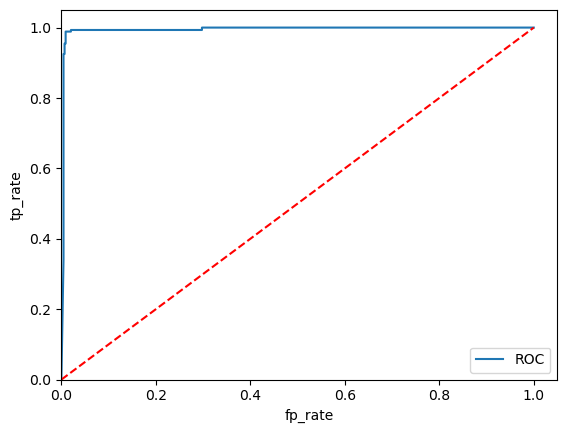

In [218]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()

# DecisionTree

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
dt=DecisionTreeClassifier(random_state=20)

In [171]:
parm={'max_depth':[10,20,30]}

In [172]:
grid=GridSearchCV(dt,parm)

In [173]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'max_depth': [10, 20, 30]})

In [174]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=20, random_state=20)

In [175]:
dt=DecisionTreeClassifier(max_depth=20, random_state=20)

In [176]:
y_pred=grid.predict(xtest)

In [177]:
confusion_matrix(ytest,y_pred)

array([[392,  55],
       [  3, 437]], dtype=int64)

In [178]:
grid.score(xtest,ytest)

0.9346110484780158

In [179]:
accuracy_score(ytest,y_pred)

0.9346110484780158

In [180]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       447
           1       0.89      0.99      0.94       440

    accuracy                           0.93       887
   macro avg       0.94      0.94      0.93       887
weighted avg       0.94      0.93      0.93       887



# SVM

In [181]:
from sklearn.svm import SVC
from sklearn import svm

In [182]:
#SVC - Suppot Vector Classifier
svc =svm.SVC(class_weight='balanced',probability=True) 
td_svc = svc.fit(xtrain,ytrain)
td_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [183]:
y_pred_lin = td_svc.predict(xtest)
len(y_pred_lin)

887

In [184]:
print('accuracy',accuracy_score(ytest,y_pred_lin))

accuracy 0.5264937993235626


In [185]:
print(confusion_matrix(ytest,y_pred_lin))

[[201 246]
 [174 266]]


In [186]:
print(classification_report(ytest,y_pred_lin))

              precision    recall  f1-score   support

           0       0.54      0.45      0.49       447
           1       0.52      0.60      0.56       440

    accuracy                           0.53       887
   macro avg       0.53      0.53      0.52       887
weighted avg       0.53      0.53      0.52       887



# Naive Bayes

In [187]:
from  sklearn.naive_bayes import GaussianNB

In [188]:
gn=GaussianNB()

In [189]:
gn.fit(xtrain,ytrain)

GaussianNB()

In [190]:
y_pred=gn.predict(xtest)

In [191]:
accuracy_score(ytest,y_pred)

0.7046223224351748

# KNN

In [192]:
params={'n_neighbors':np.arange(1,40,1)}

In [193]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=30),
             param_grid={'max_features': ['sqrt', 0.25],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1000, 1100, 1200, 1500]})

In [194]:
gd.best_params_

{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000}

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
knn=KNeighborsClassifier(n_neighbors=1000,algorithm='ball_tree')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1000)

In [204]:
y_pred=knn.predict(xtest)

In [205]:
#accuracy score
accuracy_score(ytest,y_pred)

0.5253664036076663

In [206]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.45      0.49       447
           1       0.52      0.60      0.56       440

    accuracy                           0.53       887
   macro avg       0.53      0.53      0.52       887
weighted avg       0.53      0.53      0.52       887



In [207]:
confusion_matrix(ytest,y_pred)

array([[200, 247],
       [174, 266]], dtype=int64)

In [208]:
knn=KNeighborsClassifier(n_neighbors=1100,algorithm='kd_tree')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1100)

In [209]:
accuracy_score(ytest,y_pred)

0.5253664036076663